# Chapter 8 - Quality Control

## Gleason 2019

Requires the data from the Gleason 2019 challenge, available from https://gleason2019.grand-challenge.org/

**Number of images removed per expert**

In [1]:
import json
import os

from skimage.io import imread
%matplotlib inline
from matplotlib import pyplot as plt

GLEASON_DIR = 'e:/data/Gleason2019'
RGB_TRAIN_DIR = os.path.join(GLEASON_DIR, 'train')

with open(f"./data/gleason_list_mistakes.json", "r") as fp:
    final_list_to_remove = json.load(fp)

rem_per_path = [0 for _ in range(6)]
for slide, pathologists in final_list_to_remove.items():
    for path in pathologists:
        rem_per_path[int(path[6])-1] += 1

for i,r in enumerate(rem_per_path):
    print(f"{r} images removed for expert {i+1}")

5 images removed for expert 1
119 images removed for expert 2
54 images removed for expert 3
6 images removed for expert 4
0 images removed for expert 5
1 images removed for expert 6


**Examples of mistakes in the annotation maps**

In [2]:
def anno_to_rgb(anno):
    anno_rgb = np.zeros((anno.shape[0], anno.shape[1], 3)).astype('uint8')
    anno_rgb[anno==0] = np.array([255, 255, 255])
    anno_rgb[anno==1] = np.array([0, 0, 255])
    anno_rgb[anno==3] = np.array([0, 255, 0])
    anno_rgb[anno==4] = np.array([255, 0, 0])
    anno_rgb[anno==5] = np.array([255, 255, 0])
    
    return anno_rgb

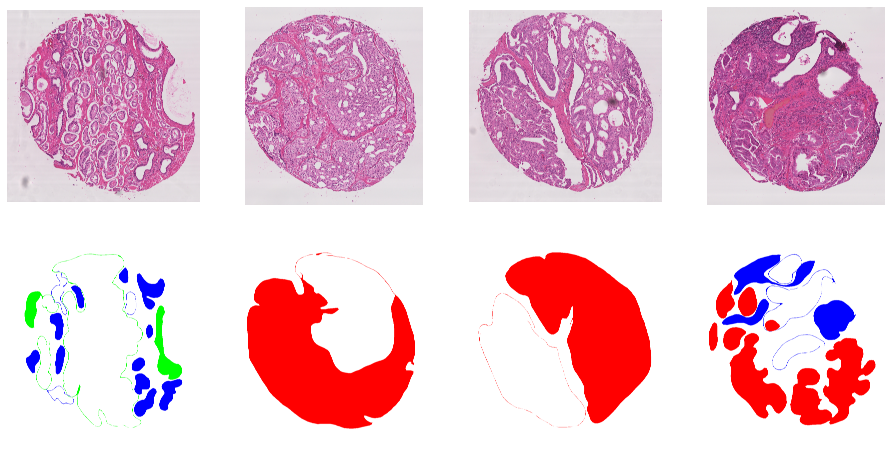

In [3]:
import numpy as np
# show some examples:
plt.figure(figsize=(20,8))
i = 1
for slide, pathologists in final_list_to_remove.items():
    path = pathologists[0]
    rgb = imread(os.path.join(RGB_TRAIN_DIR, slide))
    anno = imread(os.path.join(GLEASON_DIR, f'{path}/{slide.replace(".jpg","")}_classimg_nonconvex.png'))
    anno_rgb = anno_to_rgb(anno)
    plt.subplot(2, 5, i%5)
    plt.imshow(rgb)
    plt.axis('off')
    plt.subplot(2, 5, i%5+5)
    plt.imshow(anno_rgb)
    plt.axis('off')
    i += 1
    if i == 5:
        break
plt.show()

**Comparison with Nir, 2018**

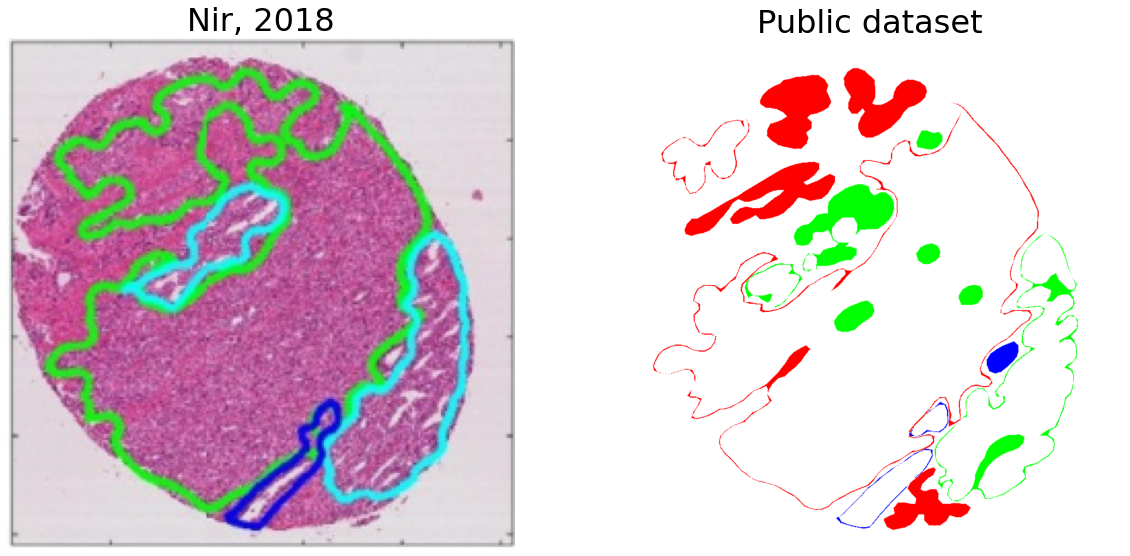

In [4]:
slide = 'slide005_core063'

nir = imread('./data/8-nir2018.png')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(nir)
plt.title('Nir, 2018', fontsize=32)
plt.axis('off')
plt.subplot(1,2,2)
anno = imread(os.path.join(GLEASON_DIR, f'Maps2_T/{slide}_classimg_nonconvex.png'))
plt.imshow(anno_to_rgb(anno))
plt.axis('off')
plt.title(f'Public dataset', fontsize=32)
plt.show()

## MoNuSAC, 2020

Complete analysis of the errors in the code is available on GitHub: https://github.com/adfoucart/monusac-results-code-analysis

This code requires the testing data and annotations and teams' predictions from the MoNuSAC challenge (https://monusac-2020.grand-challenge.org/Data/). It also uses the original submission files from team Amirreza Mahbod, which are not publicly available.

### Visualization of annotations, color-coded predictions & original submission by Mahbod et al.

[ 1  4  5 33 36 37 38]
[11 16 17 23 25 28 32]
[ 2  8 22]
[ 3  6  7 12 13 14 15 18 19 20 21 26 29 30 31 34]


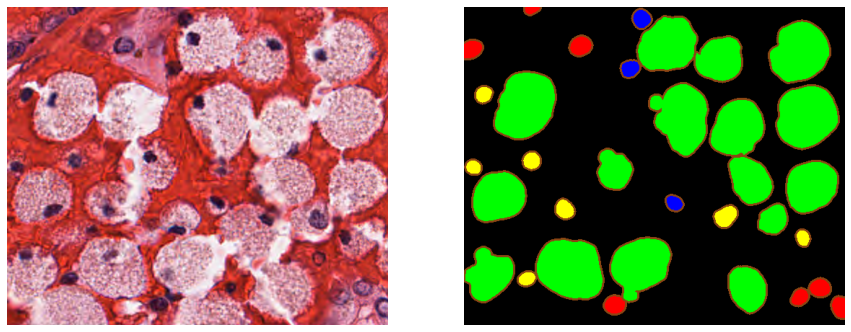

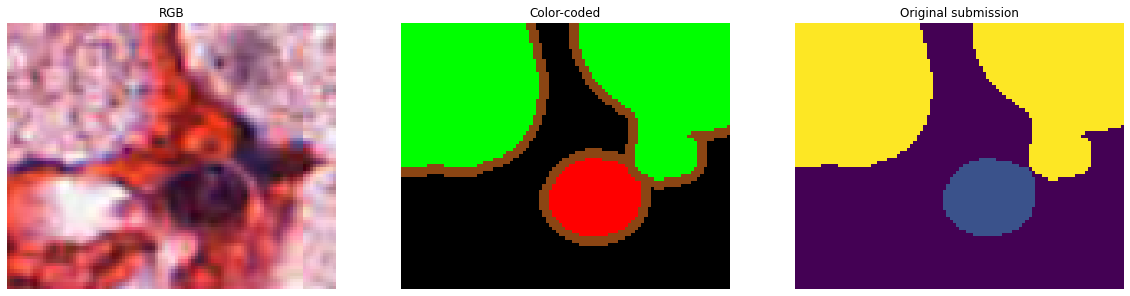

In [17]:
from datasets.monusac import _generate_mask
import scipy.io as sio

MONUSAC_PATH = "E:/data/MoNuSAC"
DATA_PATH = f"{MONUSAC_PATH}/MoNuSAC Testing Data and Annotations"
CC_PATH = f"{MONUSAC_PATH}/Teams/Amirreza Mahbod/"
OR_PATH = f"{MONUSAC_PATH}/OriginalSubmission_Mahbod/"
labels = ['Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage']
image_name = "TCGA-IZ-A6M9-01Z-00-DX1/TCGA-IZ-A6M9-01Z-00-DX1_3"

rgb = imread(f"{os.path.join(DATA_PATH, image_name)}.tif")[..., :3][..., ::-1]
cc = imread(f"{os.path.join(CC_PATH, image_name)}_mask.png.tif")

original = np.zeros((rgb.shape[0], rgb.shape[1], 2))
for idc,cl in enumerate(labels):
    mat = sio.loadmat(f"{os.path.join(OR_PATH, image_name)}/{cl}/{image_name.split('/')[1]}.mat")['img']
    print(np.unique(mat)[1:])
    #gt = np.load(f"{os.path.join(DATA_PATH, image_name)}_nary.npy")
    original[mat>0, 1] = idc+1
    original[mat>0, 0] = mat[mat>0]

    
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(rgb[..., ::-1])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cc)
plt.axis('off')
plt.show()
    
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.imshow(rgb[360:450, 150:250, ::-1])
plt.axis('off')
plt.title('RGB')
plt.subplot(1, 3, 2)
plt.imshow(cc[360:450, 150:250])
plt.axis('off')
plt.title('Color-coded')
#plt.contour(original[360:450, 150:250, 1]>0)
plt.subplot(1, 3, 3)
plt.imshow(original[360:450, 150:250, 1])
plt.title('Original submission')
#plt.contour(original[360:450, 150:250, 1]>0)
plt.axis('off')
plt.show()

### Ground truth (from XML) vs Mahbod et al.

Visualisation & comparison of the original PQ (with bug) vs the corrected PQ

Epithelial	TP	FP	FN	F1	mIoU	PQ
Original	6	5	8	0.480	0.789	0.379
Relabelled	6	4	8	0.500	0.789	0.394
Corrected	6	1	8	0.571	0.789	0.451
Lymphocyte	TP	FP	FN	F1	mIoU	PQ
Original	2	6	0	0.400	0.746	0.298
Relabelled	2	7	0	0.364	0.746	0.271
Corrected	2	5	0	0.444	0.746	0.331
Neutrophil	TP	FP	FN	F1	mIoU	PQ
Original	0	3	0	0.000	0.000	0.000
Relabelled	0	3	0	0.000	0.000	0.000
Corrected	0	3	0	0.000	0.000	0.000
Macrophage	TP	FP	FN	F1	mIoU	PQ
Original	16	9	7	0.667	0.832	0.555
Relabelled	16	5	7	0.727	0.832	0.605
Corrected	16	0	7	0.821	0.832	0.683


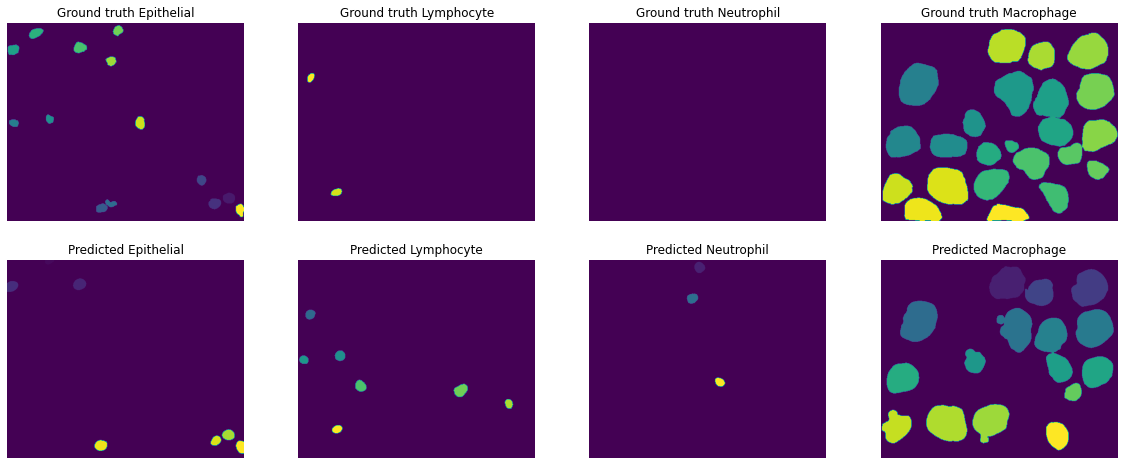

In [18]:
from metrics.PQ import Panoptic_quality, Panoptic_quality_corrected

gt = _generate_mask(f"{os.path.join(DATA_PATH, image_name)}")

ambiguous = gt[..., 1] != 5
gt_ = gt.copy().astype('int')
original_ = original.copy().astype('int')
gt_[..., 0] = gt[..., 0]*ambiguous
original_[..., 0] = original[..., 0]*ambiguous

def f1(tp, fp, fn):
    return 2*tp/(2*tp+fp+fn)

plt.figure(figsize=(20,8))
new_label = 1
for idc in range(1, 5):
    gt_nary = gt_[..., 0].copy()
    gt_mask = gt_[..., 1]==idc
    gt_nary = gt_nary*gt_mask
    pred_nary = original_[..., 0].copy()
    pred_mask = original_[..., 1]==idc
    pred_nary *= pred_mask
    relabelled = pred_nary.copy()
    for label in np.unique(pred_nary):
        if label == 0:
            continue
        relabelled[pred_nary==label] = new_label
        new_label += 1
    
    plt.subplot(2, 4, idc)
    plt.imshow(gt_nary)
    plt.axis('off')
    plt.title(f'Ground truth {labels[idc-1]}')
    plt.subplot(2, 4, idc+4)
    plt.imshow(pred_nary)
    plt.axis('off')
    plt.title(f'Predicted {labels[idc-1]}')
    PQ, TP, FP, FN, mIOU = Panoptic_quality(gt_nary, pred_nary, True)
    PQr, TPr, FPr, FNr, mIOUr = Panoptic_quality(gt_nary, relabelled, True)
    PQ2, TP2, FP2, FN2, mIOU2 = Panoptic_quality_corrected(gt_nary, pred_nary, True)
    print(f"{labels[idc-1]}\tTP\tFP\tFN\tF1\tmIoU\tPQ")
    print(f"Original\t{TP}\t{FP}\t{FN}\t{f1(TP, FP, FN):.3f}\t{mIOU:.3f}\t{PQ:.3f}")
    print(f"Relabelled\t{TPr}\t{FPr}\t{FNr}\t{f1(TPr, FPr, FNr):.3f}\t{mIOUr:.3f}\t{PQr:.3f}")
    print(f"Corrected\t{TP2}\t{FP2}\t{FN2}\t{f1(TP2, FP2, FN2):.3f}\t{mIOU2:.3f}\t{PQ2:.3f}")
plt.show()

**Re-computing on the whole dataset (keeping ignored FP error)**

In [19]:
from tqdm import tqdm

PQs_original = []
PQs_relab = []
PQs_corr = []

patients = [p for p in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH,p))]
for patient in tqdm(patients):
    patient_dir = os.path.join(DATA_PATH, patient)
    images = [i.replace('.svs', '') for i in os.listdir(patient_dir) if i.endswith('.svs')]
    for im in images:
        image_name = f"{patient}/{im}"

        rgb = imread(f"{os.path.join(DATA_PATH, image_name)}.tif")[..., :3][..., ::-1]
        cc = imread(f"{os.path.join(CC_PATH, image_name)}_mask.png.tif")

        original = np.zeros((rgb.shape[0], rgb.shape[1], 2))
        gt = _generate_mask(f"{os.path.join(DATA_PATH, image_name)}")
        for idc,cl in enumerate(labels):
            mat = sio.loadmat(f"{os.path.join(OR_PATH, image_name)}/{cl}/{image_name.split('/')[1]}.mat")['img']
            #gt = np.load(f"{os.path.join(DATA_PATH, image_name)}_nary.npy")
            original[mat>0, 1] = idc+1
            original[mat>0, 0] = mat[mat>0]
        
        ambiguous = gt[..., 1] != 5
        gt_ = gt.copy().astype('int')
        original_ = original.copy().astype('int')
        gt_[..., 0] = gt[..., 0]*ambiguous
        original_[..., 0] = original[..., 0]*ambiguous
        
        PQc_or = []
        PQc_relab = []
        PQc_corr = []
        new_lab = 1
        for idc in range(1, 5):
            if gt_[..., 0].sum() == 0 and original_[..., 0].sum() == 0:
                continue
            
            gt_nary = gt_[..., 0].copy()
            gt_mask = gt_[..., 1]==idc
            gt_nary = gt_nary*gt_mask
            pred_nary_ = original_[..., 0].copy()
            pred_nary = np.zeros_like(pred_nary_)
            pred_mask = original_[..., 1]==idc
            pred_nary_ *= pred_mask
            
            if gt_nary.sum()==0 and pred_nary_.sum()==0:
                continue
            
            for lab in np.unique(pred_nary_):
                if lab==0: 
                    continue
                pred_nary[pred_nary_==lab] = new_lab
                new_lab += 1
            
            PQc_or.append(Panoptic_quality(gt_nary, pred_nary_))
            PQc_relab.append(Panoptic_quality(gt_nary, pred_nary))
            PQc_corr.append(Panoptic_quality_corrected(gt_nary, pred_nary))
        
        PQs_original.append(sum(PQc_or)/len(PQc_or))
        PQs_relab.append(sum(PQc_relab)/len(PQc_relab))
        PQs_corr.append(sum(PQc_corr)/len(PQc_corr))

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [19:40<00:00, 47.21s/it]


In [20]:
print(f"Original aPQ = {sum(PQs_original)/len(PQs_original):.3f}")
print(f"Relabelled aPQ = {sum(PQs_relab)/len(PQs_relab):.3f}")
print(f"Corrected aPQ = {sum(PQs_corr)/len(PQs_corr):.3f}")

Original aPQ = 0.410
Relabelled aPQ = 0.429
Corrected aPQ = 0.456


**Re-computing on the whole dataset (with ignored FP error corrected)**

In [21]:
# Re-labelling on all dataset - with missed FPs 
PQs_original = []
PQs_relab = []
PQs_corr = []

patients = [p for p in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH,p))]
for patient in tqdm(patients):
    patient_dir = os.path.join(DATA_PATH, patient)
    images = [i.replace('.svs', '') for i in os.listdir(patient_dir) if i.endswith('.svs')]
    for im in images:
        image_name = f"{patient}/{im}"

        rgb = imread(f"{os.path.join(DATA_PATH, image_name)}.tif")[..., :3][..., ::-1]
        cc = imread(f"{os.path.join(CC_PATH, image_name)}_mask.png.tif")

        original = np.zeros((rgb.shape[0], rgb.shape[1], 2))
        gt = _generate_mask(f"{os.path.join(DATA_PATH, image_name)}")
        for idc,cl in enumerate(labels):
            mat = sio.loadmat(f"{os.path.join(OR_PATH, image_name)}/{cl}/{image_name.split('/')[1]}.mat")['img']
            #gt = np.load(f"{os.path.join(DATA_PATH, image_name)}_nary.npy")
            original[mat>0, 1] = idc+1
            original[mat>0, 0] = mat[mat>0]
        
        ambiguous = gt[..., 1] != 5
        gt_ = gt.copy().astype('int')
        original_ = original.copy().astype('int')
        gt_[..., 0] = gt[..., 0]*ambiguous
        original_[..., 0] = original[..., 0]*ambiguous
        
        new_lab = 1
        PQc_or = []
        PQc_relab = []
        PQc_corr = []
        for idc in range(1, 5):
            if gt_[..., 0].sum() == 0 and original_[..., 0].sum() == 0:
                continue
            
            gt_nary = gt_[..., 0].copy()
            gt_mask = gt_[..., 1]==idc
            gt_nary = gt_nary*gt_mask
            pred_nary_ = original_[..., 0].copy()
            pred_nary = np.zeros_like(pred_nary_)
            pred_mask = original_[..., 1]==idc
            pred_nary_ *= pred_mask
            
            if gt_nary.sum()==0:
                continue
            
            for lab in np.unique(pred_nary_):
                if lab==0: 
                    continue
                pred_nary[pred_nary_==lab] = new_lab
                new_lab += 1
            
            PQc_or.append(Panoptic_quality(gt_nary, pred_nary_))
            PQc_relab.append(Panoptic_quality(gt_nary, pred_nary))
            PQc_corr.append(Panoptic_quality_corrected(gt_nary, pred_nary))
        
        PQs_original.append(sum(PQc_or)/len(PQc_or))
        PQs_relab.append(sum(PQc_relab)/len(PQc_relab))
        PQs_corr.append(sum(PQc_corr)/len(PQc_corr))
    
print(f"Original aPQ = {sum(PQs_original)/len(PQs_original):.3f}")
print(f"Relabelled aPQ = {sum(PQs_relab)/len(PQs_relab):.3f}")
print(f"Corrected aPQ = {sum(PQs_corr)/len(PQs_corr):.3f}")

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [18:28<00:00, 44.34s/it]

Original aPQ = 0.536
Relabelled aPQ = 0.566
Corrected aPQ = 0.596


**Per-patient aggregation (with missed FP and corrected typo)**

In [22]:
# Per-patient aggreg - with missed FPs and corrected typo
PQs = []

patients = [p for p in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH,p))]
for patient in tqdm(patients):
    patient_dir = os.path.join(DATA_PATH, patient)

    TPs = [0 for _ in range(4)]
    FPs = [0 for _ in range(4)]
    FNs = [0 for _ in range(4)]
    sIoUs = [0 for _ in range(4)]

    images = [i.replace('.svs', '') for i in os.listdir(patient_dir) if i.endswith('.svs')]
    for im in images:
        image_name = f"{patient}/{im}"

        rgb = imread(f"{os.path.join(DATA_PATH, image_name)}.tif")[..., :3][..., ::-1]
        cc = imread(f"{os.path.join(CC_PATH, image_name)}_mask.png.tif")

        original = np.zeros((rgb.shape[0], rgb.shape[1], 2))
        gt = _generate_mask(f"{os.path.join(DATA_PATH, image_name)}")
        for idc,cl in enumerate(labels):
            mat = sio.loadmat(f"{os.path.join(OR_PATH, image_name)}/{cl}/{image_name.split('/')[1]}.mat")['img']
            original[mat>0, 1] = idc+1
            original[mat>0, 0] = mat[mat>0]
        
        ambiguous = gt[..., 1] != 5
        gt_ = gt.copy().astype('int')
        original_ = original.copy().astype('int')
        gt_[..., 0] = gt[..., 0]*ambiguous
        original_[..., 0] = original[..., 0]*ambiguous
        
        new_lab = 1
        for idc in range(1, 5):
            if gt_[..., 0].sum() == 0 and original_[..., 0].sum() == 0:
                continue
            
            gt_nary = gt_[..., 0].copy()
            gt_mask = gt_[..., 1]==idc
            gt_nary = gt_nary*gt_mask
            pred_nary_ = original_[..., 0].copy()
            pred_nary = np.zeros_like(pred_nary_)
            pred_mask = original_[..., 1]==idc
            pred_nary_ *= pred_mask
            
            if gt_nary.sum()==0:
                continue
            
            PQ, TP, FP, FN, mIoU = Panoptic_quality_corrected(gt_nary, pred_nary_, True)
            TPs[idc-1] += TP
            FPs[idc-1] += FP
            FNs[idc-1] += FN
            sIoUs[idc-1] += mIoU*TP
        
    PQcs = []
    for i in range(4):
        if 2*TPs[i]+FPs[i]+FNs[i] == 0:
           continue
        PQcs.append((sIoUs[i]/max(1,TPs[i]))*(2*TPs[i]/(2*TPs[i]+FPs[i]+FNs[i])))
    PQs.append(sum(PQcs)/len(PQcs))

print(f"aPQ = {sum(PQs)/len(PQs):.3f}")

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:16<00:00, 15.05s/it]

aPQ = 0.618


**Per-patient aggregation, with corrected typo & corrected missed FP**

In [23]:
PQs = []

patients = [p for p in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH,p))]
for patient in tqdm(patients):
    patient_dir = os.path.join(DATA_PATH, patient)

    TPs = [0 for _ in range(4)]
    FPs = [0 for _ in range(4)]
    FNs = [0 for _ in range(4)]
    sIoUs = [0 for _ in range(4)]

    images = [i.replace('.svs', '') for i in os.listdir(patient_dir) if i.endswith('.svs')]
    for im in images:
        image_name = f"{patient}/{im}"

        rgb = imread(f"{os.path.join(DATA_PATH, image_name)}.tif")[..., :3][..., ::-1]
        cc = imread(f"{os.path.join(CC_PATH, image_name)}_mask.png.tif")

        original = np.zeros((rgb.shape[0], rgb.shape[1], 2))
        gt = _generate_mask(f"{os.path.join(DATA_PATH, image_name)}")
        for idc,cl in enumerate(labels):
            mat = sio.loadmat(f"{os.path.join(OR_PATH, image_name)}/{cl}/{image_name.split('/')[1]}.mat")['img']
            #gt = np.load(f"{os.path.join(DATA_PATH, image_name)}_nary.npy")
            original[mat>0, 1] = idc+1
            original[mat>0, 0] = mat[mat>0]
        
        ambiguous = gt[..., 1] != 5
        gt_ = gt.copy().astype('int')
        original_ = original.copy().astype('int')
        gt_[..., 0] = gt[..., 0]*ambiguous
        original_[..., 0] = original[..., 0]*ambiguous
        
        new_lab = 1
        for idc in range(1, 5):
            if gt_[..., 0].sum() == 0 and original_[..., 0].sum() == 0:
                continue
            
            gt_nary = gt_[..., 0].copy()
            gt_mask = gt_[..., 1]==idc
            gt_nary = gt_nary*gt_mask
            pred_nary_ = original_[..., 0].copy()
            pred_nary = np.zeros_like(pred_nary_)
            pred_mask = original_[..., 1]==idc
            pred_nary_ *= pred_mask
            
            if gt_nary.sum()==0 and pred_nary_.sum()==0:
                continue
            
            PQ, TP, FP, FN, mIoU = Panoptic_quality_corrected(gt_nary, pred_nary_, True)
            TPs[idc-1] += TP
            FPs[idc-1] += FP
            FNs[idc-1] += FN
            sIoUs[idc-1] += mIoU*TP
        
    PQcs = []
    for i in range(4):
        if 2*TPs[i]+FPs[i]+FNs[i] == 0:
           continue
        PQcs.append((sIoUs[i]/max(1,TPs[i]))*(2*TPs[i]/(2*TPs[i]+FPs[i]+FNs[i])))
    PQs.append(sum(PQcs)/len(PQcs))

print(f"aPQ = {sum(PQs)/len(PQs):.3f}")

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:27<00:00, 15.49s/it]

aPQ = 0.563
